In [1]:
!git clone https://github.com/hungpham13/Distributed-data-discretization
%cd Distributed-data-discretization/
!pip install -r requirements.txt

Cloning into 'Distributed-data-discretization'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 102 (delta 56), reused 48 (delta 23), pack-reused 0
Receiving objects: 100% (102/102), 22.19 MiB | 32.70 MiB/s, done.
Resolving deltas: 100% (56/56), done.
/content/Distributed-data-discretization
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 283 kB 36.3 MB/s 


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# data_true = pd.read_csv('2021D1.csv')
# data_false = pd.read_csv('OtherD1.csv')

In [ ]:
# data_true['Label'] = 0
# data_false['Label'] = 1
# data = pd.concat([data_true,data_false], ignore_index=True)
# data = data.drop(columns='Unnamed: 0')
# data = data.sample(frac=1, ignore_index=True)

In [ ]:
# data = pd.read_csv('data.csv')
# data = data.drop(columns='Unnamed: 0')
# data

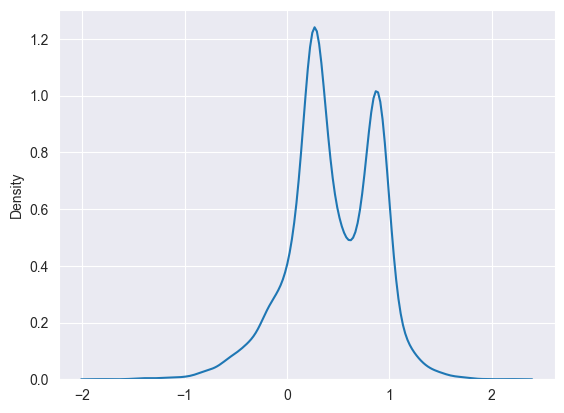

Config: [(0.195212670306239, 0.48995311510212464), (0.45045001229448633, 0.38252967945907446), (0.42717183809981285, 0.4770803051598758), (0.27257091683203505, 0.08400688958592104), (0.8891191274904617, 0.08492209258962154)]
[[160   0]
 [ 39   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       160
           1       0.00      0.00      0.00        39

    accuracy                           0.80       199
   macro avg       0.40      0.50      0.45       199
weighted avg       0.65      0.80      0.72       199



/home/hung/Distributed-data-discretization/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hung/Distributed-data-discretization/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hung/Distributed-data-discretization/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

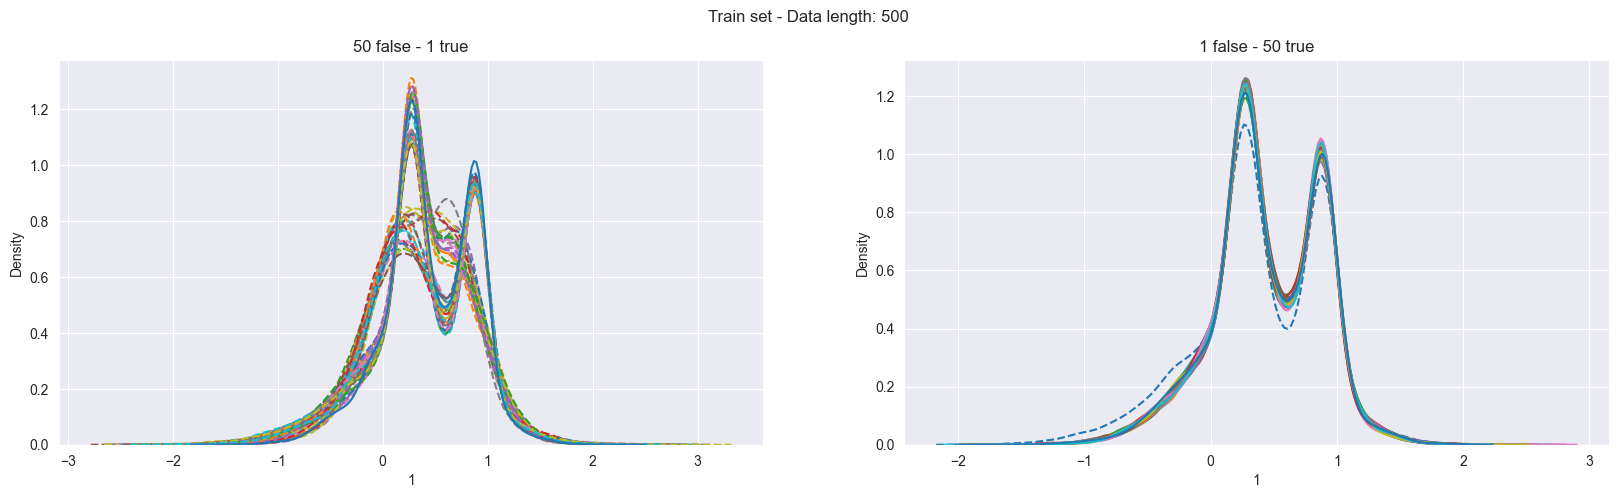

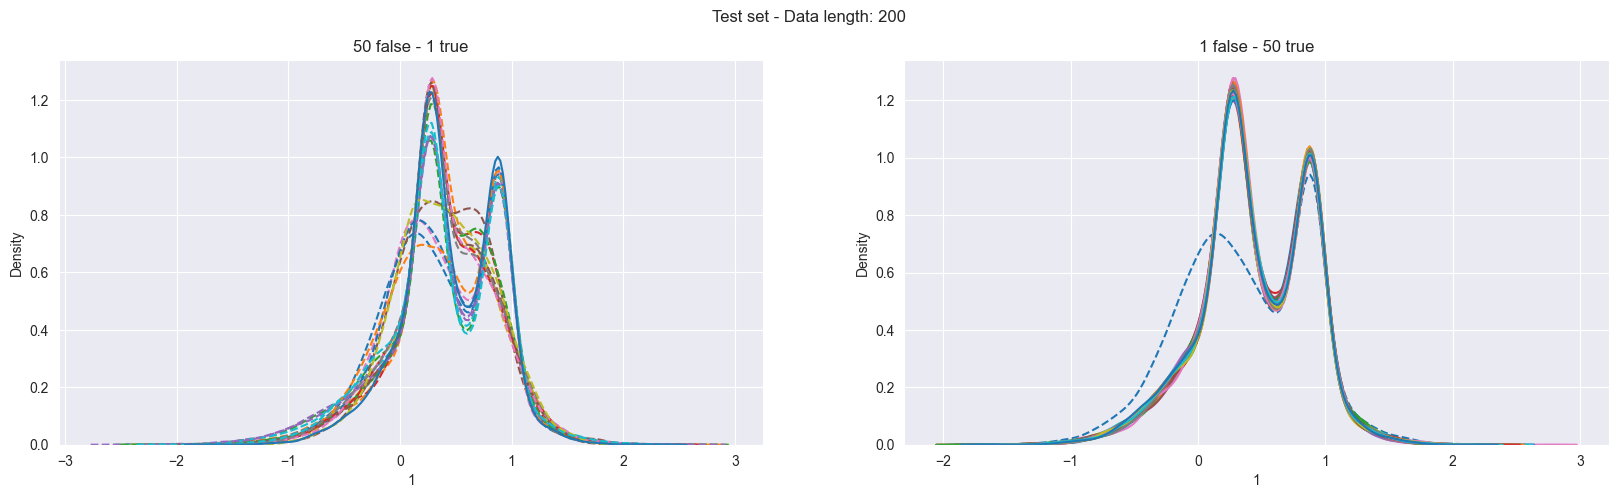

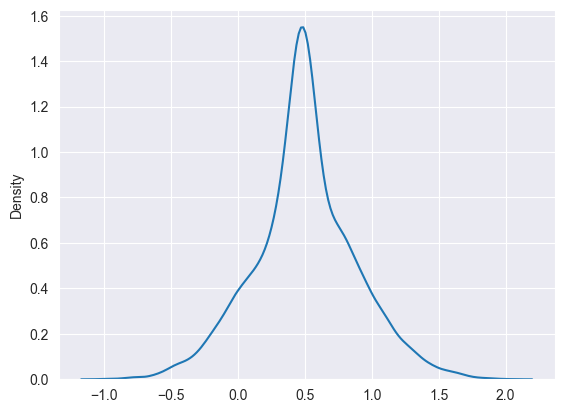

Config: [(0.707645089937062, 0.34968426662569), (0.4758088095555648, 0.07441838375432157), (0.35037968758413873, 0.42436263939416613), (0.3053458273188464, 0.33958233289605055), (0.6549684262873435, 0.43403512745292844)]
[[159   0]
 [ 38   2]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       159
           1       1.00      0.05      0.10        40

    accuracy                           0.81       199
   macro avg       0.90      0.53      0.49       199
weighted avg       0.85      0.81      0.73       199



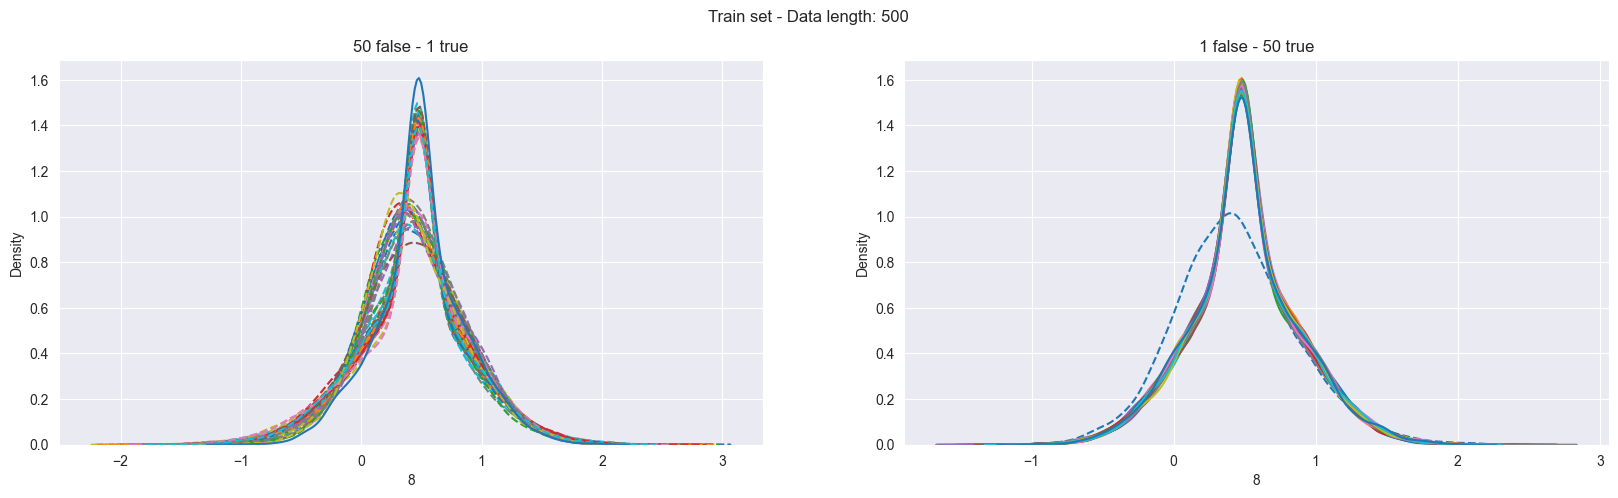

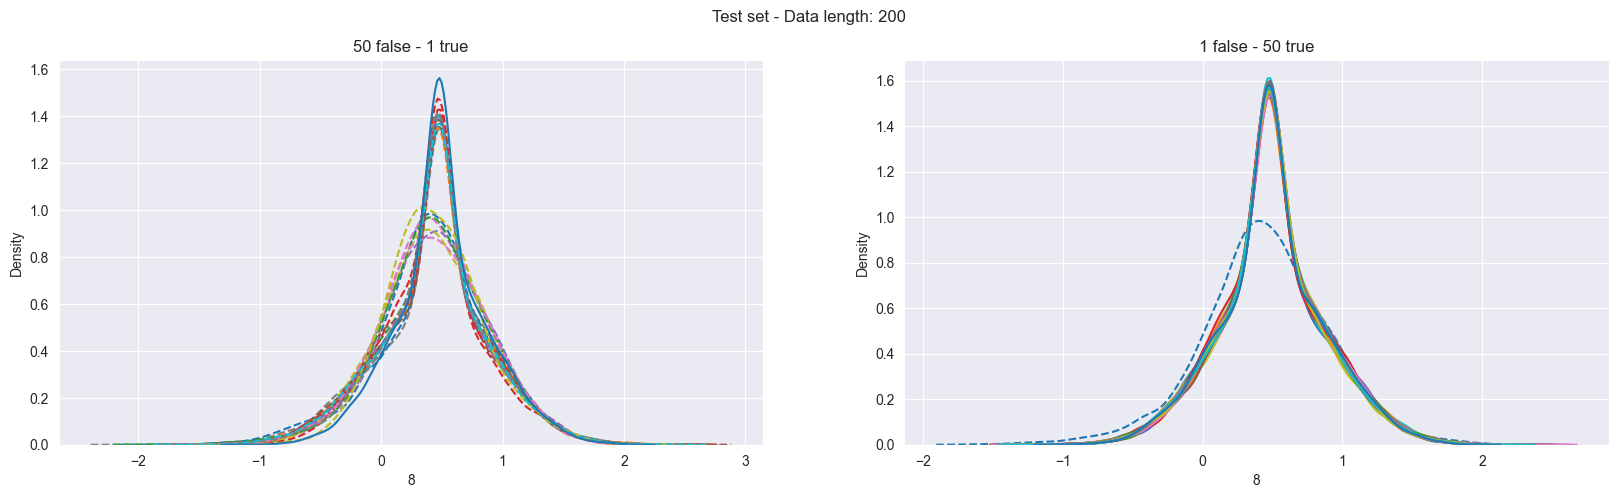

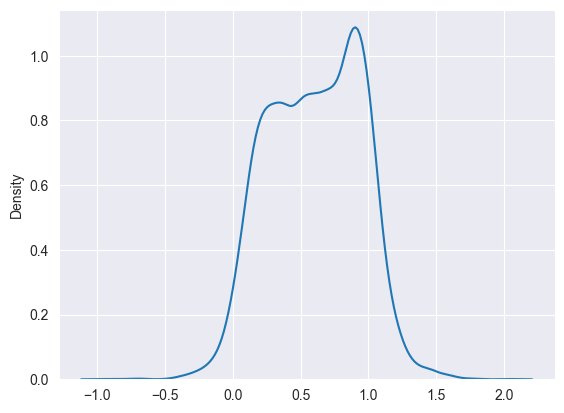

Config: [(0.706308225387501, 0.1971538766875111), (0.23164105656447354, 0.13723178414610412), (0.5114182796993618, 0.256366341989012), (0.9500553192144024, 0.11329058051718933), (0.6324276121106374, 0.40652915830699643)]
[[162   0]
 [ 20  17]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       162
           1       1.00      0.46      0.63        37

    accuracy                           0.90       199
   macro avg       0.95      0.73      0.79       199
weighted avg       0.91      0.90      0.88       199



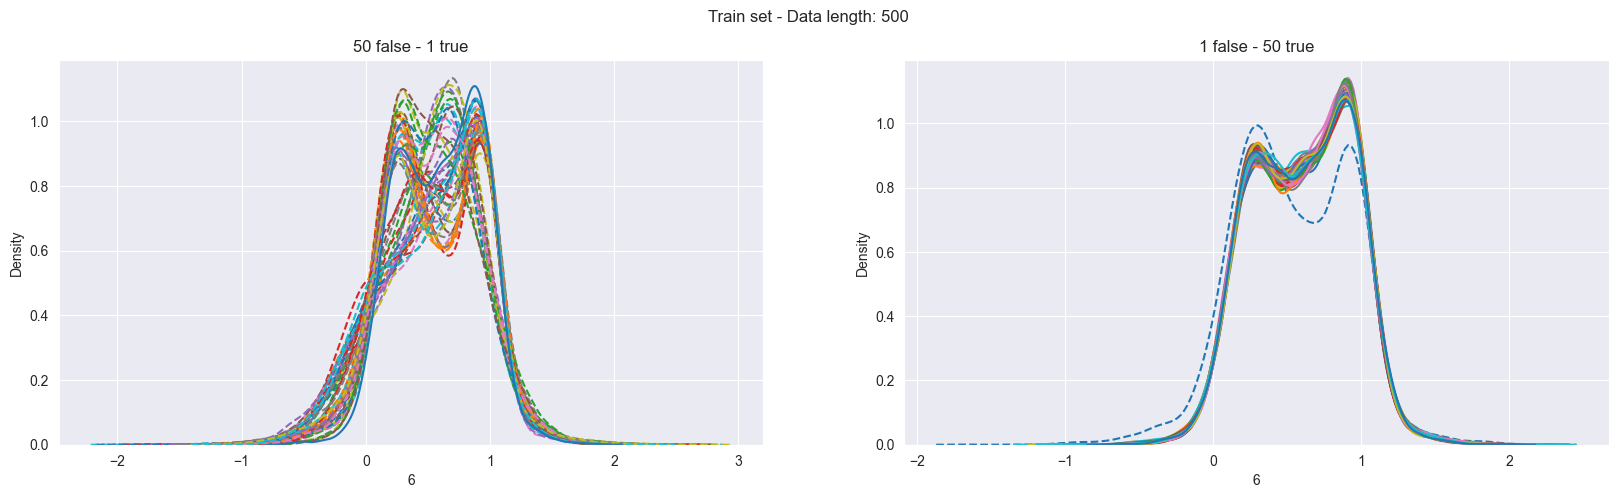

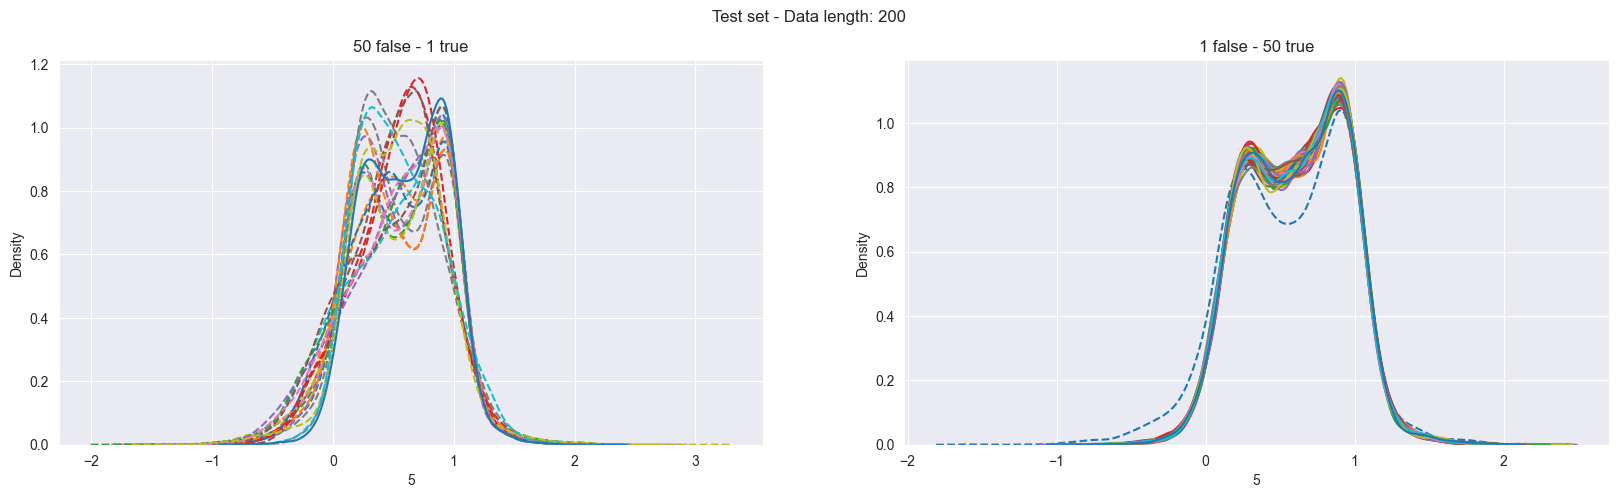

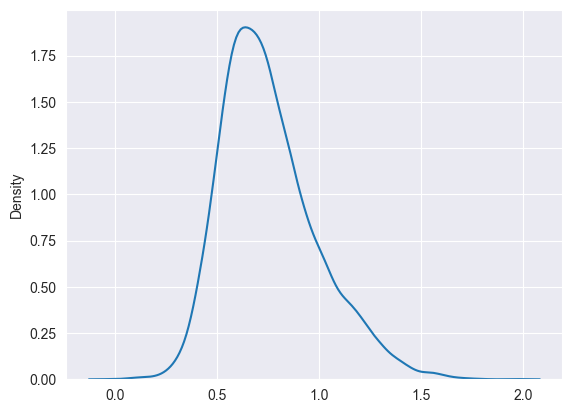

Config: [(0.5582464415616067, 0.10760329171889861), (0.6866422512554602, 0.12468426412051963), (0.905154146572676, 0.27343256423542006), (0.7322520827431761, 0.15504859213094732), (0.9130022895769625, 0.26107443624185184)]
[[161   0]
 [  3  35]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       161
           1       1.00      0.92      0.96        38

    accuracy                           0.98       199
   macro avg       0.99      0.96      0.97       199
weighted avg       0.99      0.98      0.98       199



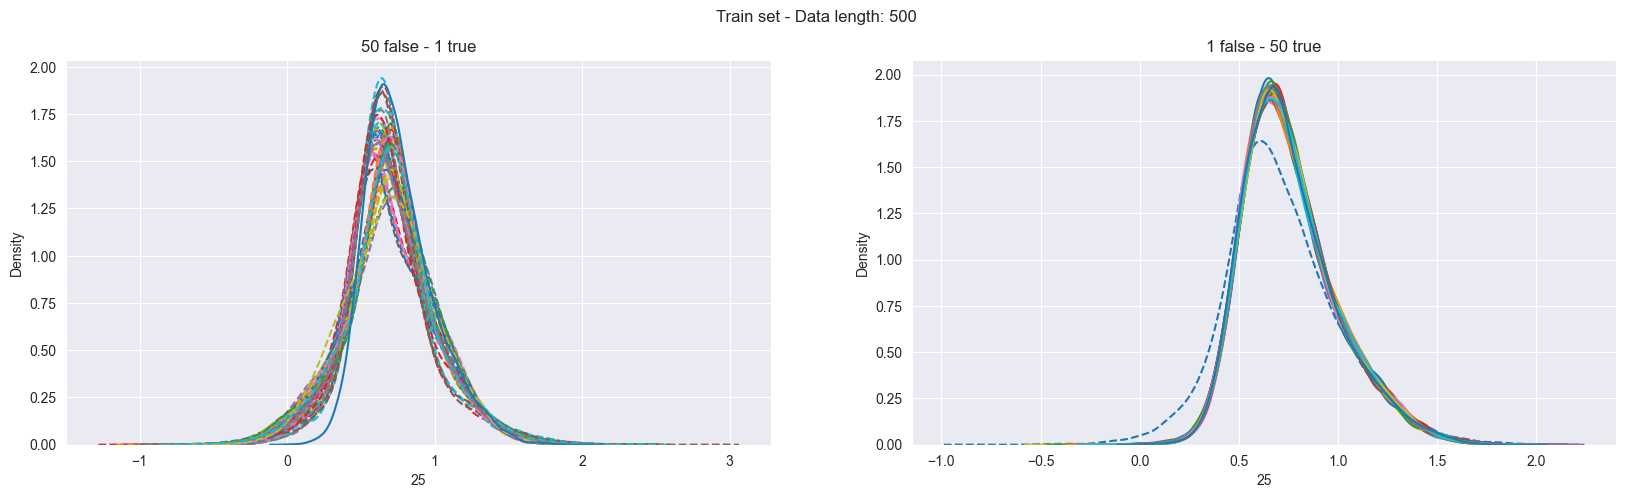

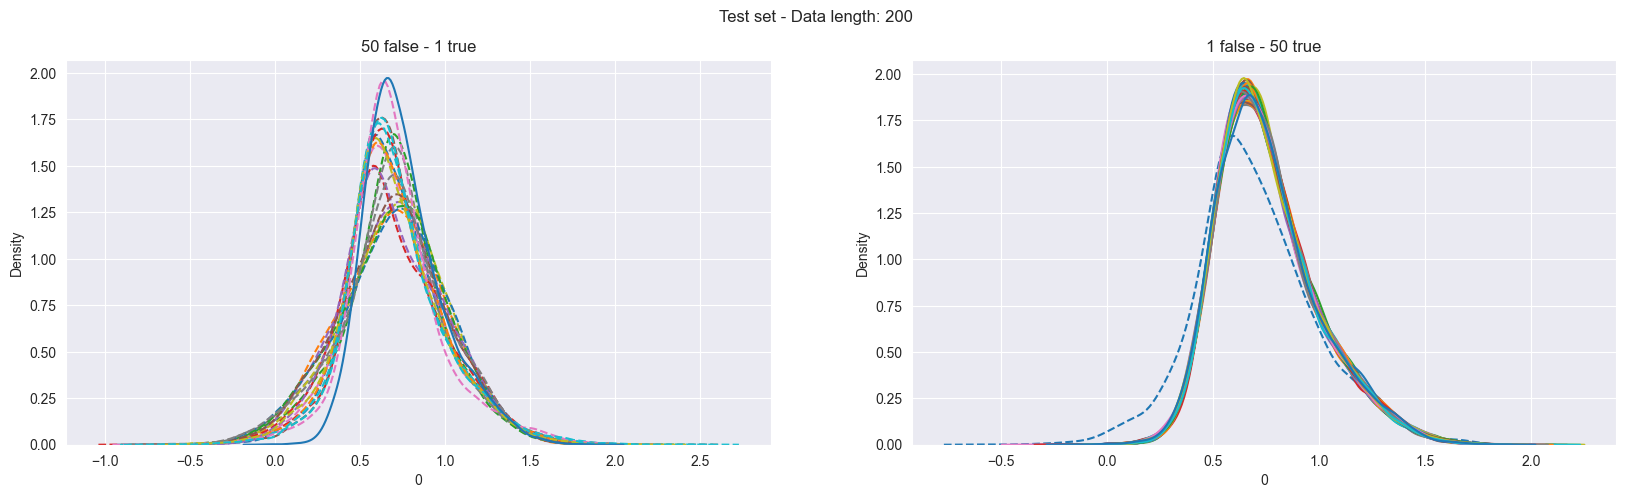

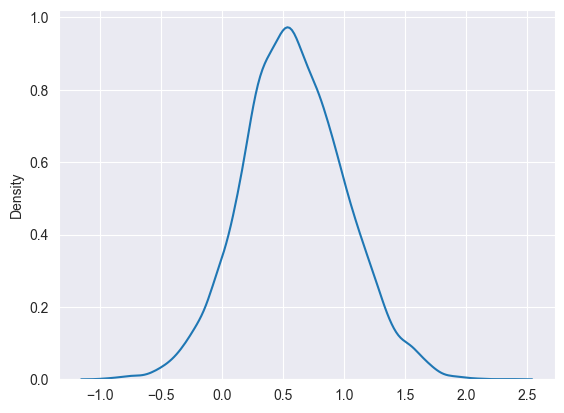

Config: [(0.5641583123056539, 0.3493659255768463), (0.7933165859247052, 0.3966715524585557), (0.470473882424123, 0.24589768473690987), (0.19967942251921333, 0.349120043635907), (0.8920838979320174, 0.3697244239406381)]
[[160   0]
 [ 39   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       160
           1       0.00      0.00      0.00        39

    accuracy                           0.80       199
   macro avg       0.40      0.50      0.45       199
weighted avg       0.65      0.80      0.72       199



/home/hung/Distributed-data-discretization/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hung/Distributed-data-discretization/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hung/Distributed-data-discretization/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

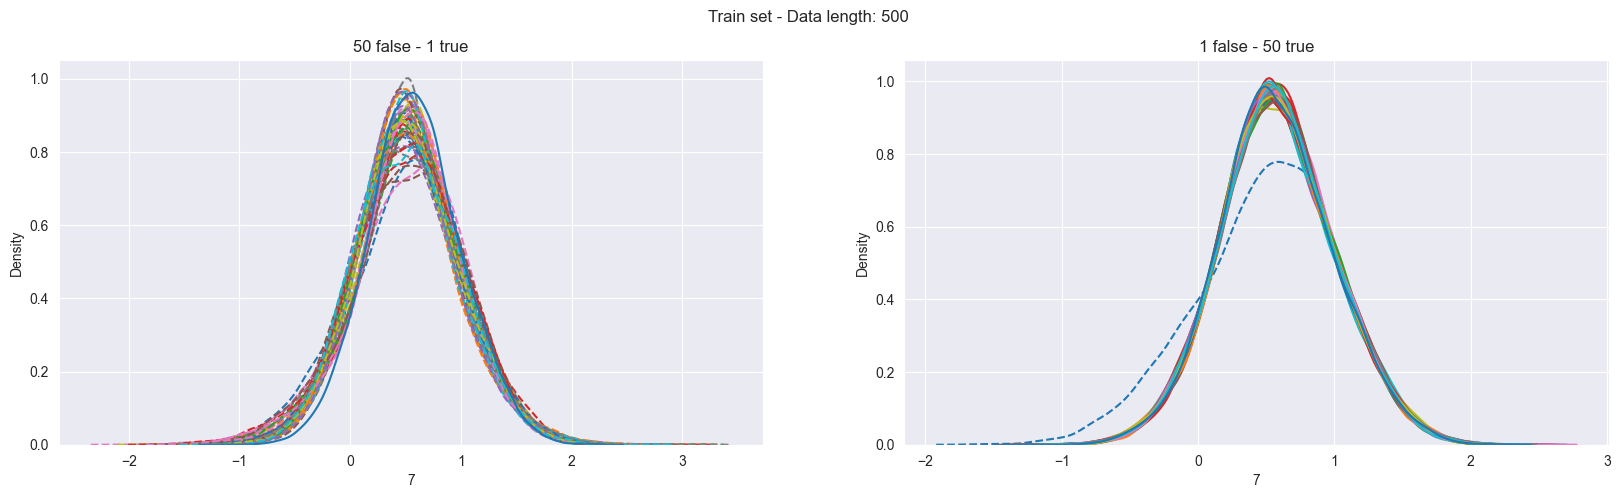

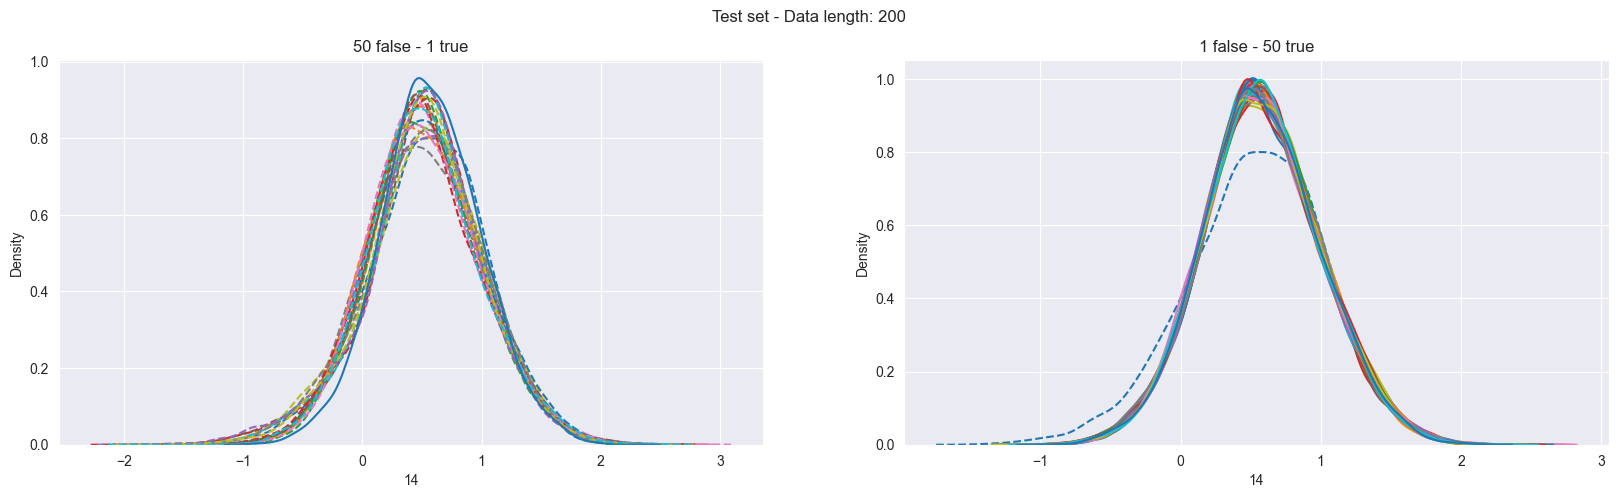

In [1]:
from model.equal_bin import run
run(num_tries=5)

In [ ]:
Truth_False_index = []
for i in range(699):
    if data['Label'].loc[i]|data['Label'].loc[i+1] == 1:
        Truth_False_index.append(i)

In [ ]:
True_predict = list(set(Truth_False_index) & set(false_index))
True_predict.sort()
True_predict

[0,
 6,
 8,
 15,
 16,
 22,
 23,
 32,
 33,
 54,
 55,
 90,
 91,
 104,
 105,
 110,
 111,
 123,
 124,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 150,
 151,
 168,
 169,
 188,
 189,
 207,
 208,
 220,
 221,
 222,
 228,
 229,
 238,
 239,
 240,
 253,
 254,
 263,
 264,
 275,
 277,
 278,
 279,
 293,
 294,
 298,
 299,
 301,
 302,
 309,
 310,
 311,
 312,
 315,
 316,
 329,
 330,
 332,
 334,
 335,
 337,
 338,
 343,
 344,
 363,
 364,
 372,
 373,
 381,
 382,
 393,
 394,
 404,
 405,
 407,
 408,
 413,
 414,
 435,
 436,
 474,
 475,
 487,
 488,
 506,
 507,
 517,
 519,
 520,
 521,
 544,
 545,
 550,
 552,
 553,
 561,
 562,
 566,
 567,
 568,
 569,
 580,
 581,
 583,
 584,
 592,
 605,
 606,
 654,
 655,
 664,
 665,
 674,
 675,
 681,
 682,
 686,
 687]

In [ ]:
len(True_predict)

125

In [ ]:
acc = len(True_predict)/len(Truth_False_index)
acc

0.9541984732824428

<AxesSubplot:>

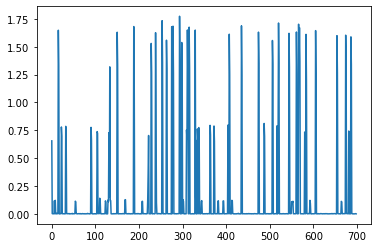

In [ ]:
sns.lineplot(x = [i for i in range(699)], y = psi_list)

In [ ]:
psi_list

[0.6554616446025187,
 0.00307836575997679,
 0.0016816819661602742,
 0.0017428896793646083,
 0.0018763501390288806,
 0.0015975776633448853,
 0.1187231136909347,
 0.0021978240511302135,
 0.12205671593718916,
 0.002081792025107919,
 0.001927601528525303,
 0.005609679946798963,
 0.0017932748837567538,
 0.002321044382126428,
 0.0029702382257913856,
 1.6473720101346967,
 1.3338092976223885,
 0.0003757204011596923,
 0.0006051267062459223,
 0.0024751673960933464,
 0.0017632389869012414,
 0.0019105321799705182,
 0.7799519214407544,
 0.6973027791410468,
 0.0023778842063447454,
 0.0013468578533110545,
 0.0012486121420377289,
 0.002303177703250898,
 0.0017057667486959297,
 0.0007595033755266891,
 0.0008007625724595911,
 0.001420934670916733,
 0.7855862722126412,
 0.6797232013303214,
 0.002874001460901058,
 0.002228300282938395,
 0.0019383228373762188,
 0.0027691890636620383,
 0.002571415406327669,
 0.002203110867574051,
 0.0035659049587503495,
 0.0006075222125100342,
 0.001016310522956398,
 0.0013

0.1187231136909347


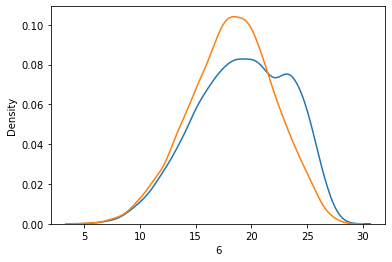

In [ ]:
sns.kdeplot(data_distribution.loc[6])
sns.kdeplot(data_distribution.loc[7])
print(psi_list[6])

0.0021978240511302135


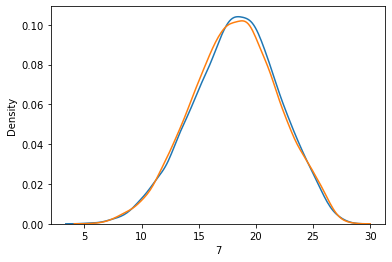

In [ ]:
sns.kdeplot(data_distribution.loc[7])
sns.kdeplot(data_distribution.loc[8])
print(psi_list[7])

0.12205671593718916


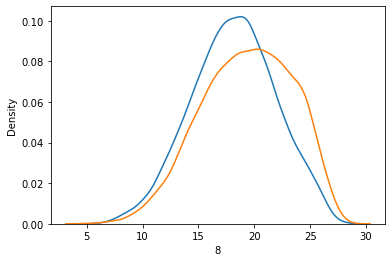

In [ ]:
sns.kdeplot(data_distribution.loc[8])
sns.kdeplot(data_distribution.loc[9])
print(psi_list[8])